<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [14]:
# Import all necessary libraries.
import os
import cv2
import numpy as np
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

# specify the path to Mask_RCNN if you placed it outside Nomeroff-net project
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')

MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, 'logs')
MASK_RCNN_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/mask_rcnn_numberplate_0700.h5")
OPTIONS_MODEL_PATH =  os.path.join(NOMEROFF_NET_DIR, "models/numberplate_options_2019_05_20.h5")

# If you use gpu version tensorflow please change model to gpu version named like *-gpu.pb
mode = "cpu"
# OCR_NP_UKR_TEXT = os.path.join(NOMEROFF_NET_DIR, "models/anpr_ocr_ua_12-{}.h5".format(mode))
OCR_NP_EU_TEXT =  os.path.join(NOMEROFF_NET_DIR, "models/anpr_ocr_eu_2-{}.h5".format(mode))
OCR_NP_RU_TEXT =  os.path.join(NOMEROFF_NET_DIR, "models/anpr_ocr_ru_3-{}.h5".format(mode))
OCR_NP_KZ_TEXT =  os.path.join(NOMEROFF_NET_DIR, "models/anpr_ocr_kz_4-{}.h5".format(mode))
OCR_NP_KZ_2LINE_TEXT = os.path.join(NOMEROFF_NET_DIR, "models/anpr_ocr_kz-box_1-{}.h5".format(mode))

sys.path.append(NOMEROFF_NET_DIR)

Also you may use .pb models for options detectors or OCR detectors. 
More about conversion and preparing for inference withit https://github.com/ria-com/nomeroff-net/blob/master/examples/inference_convert.ipynb.

In [15]:
# Import license plate recognition tools.
from NomeroffNet import  filters, RectDetector, TextDetector, OptionsDetector, Detector, textPostprocessing, textPostprocessingAsync

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
nnet.loadModel(MASK_RCNN_MODEL_PATH)

rectDetector = RectDetector()

optionsDetector = OptionsDetector({
    "class_region": ["xx_unknown", "eu_ua_2015", "eu_ua_2004", "eu_ua_1995", "eu", "xx_transit", "ru", "kz", "kz_box"]
})
optionsDetector.load(OPTIONS_MODEL_PATH)

# Initialize text detector.
textDetector = TextDetector({
#     "eu_ua_2004_2015": {
#         "for_regions": ["eu_ua_2015", "eu_ua_2004"],
#         "model_path": OCR_NP_UKR_TEXT
#     },
    "eu": {
        "for_regions": ["eu", "eu_ua_1995"],
        "model_path": OCR_NP_EU_TEXT
    },
    "ru": {
        "for_regions": ["ru"],
        "model_path": OCR_NP_RU_TEXT
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": OCR_NP_KZ_TEXT
    },
    "kz_box": {
        "for_regions": ["kz_box"],
        "model_path": OCR_NP_KZ_2LINE_TEXT
    }
})

images/O13QQhs8jTawkM2gXm1ToA=s800.jpeg


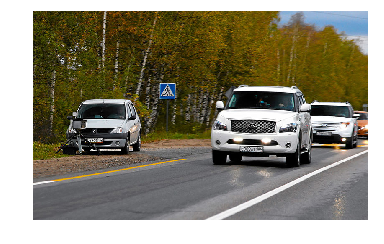

[[[125.         304.        ]
  [170.20804793 304.        ]
  [167.31539762 321.35590184]
  [125.         314.58543822]]

 [[552.         324.        ]
  [552.         339.        ]
  [493.         339.        ]
  [493.         324.        ]]

 [[342.         172.        ]
  [342.         207.85380604]
  [301.         209.05968839]
  [301.         172.        ]]]


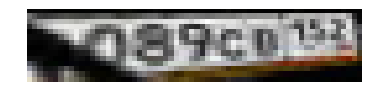

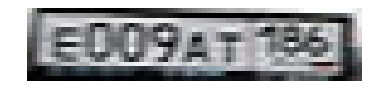

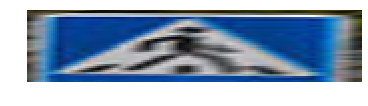

['xx_unknown', 'ru', 'xx_unknown']
['', 'E009AT1663', '']
images/16-39-40car.png


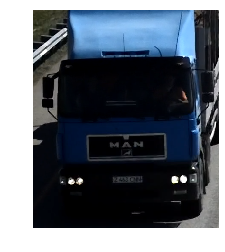

[]
[]
[]
images/250030939.jpeg


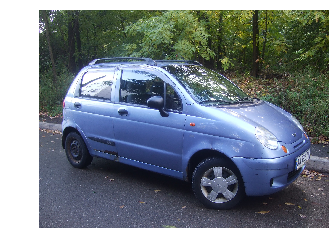

[[[1497.4088883   756.53307766]
  [1492.3415766   813.54033427]
  [1415.          880.05409014]
  [1415.          818.04957174]]]


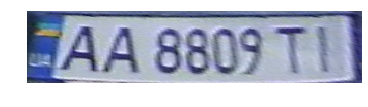

['eu_ua_2015']
['']
images/16-44-39car.png


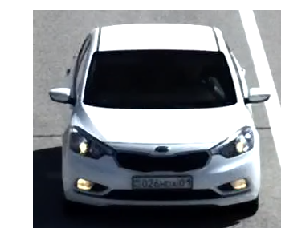

[]
[]
[]
images/16-43-40car.png


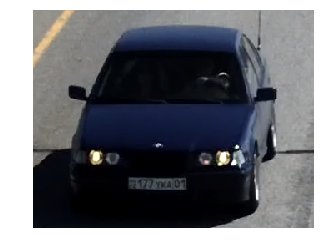

[]
[]
[]
images/16-43-14car.png


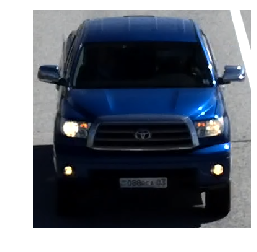

[]
[]
[]
images/inx960x640.jpg


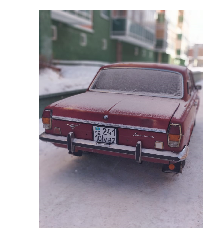

[[[411.12101053 622.26422454]
  [413.68571025 703.05226571]
  [285.89343957 697.61429675]
  [282.17860405 612.17307969]]]


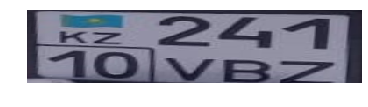

['kz']
['5133']
images/16-41-08car.png


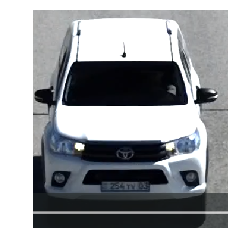

[]
[]
[]
images/16-40-15car.png


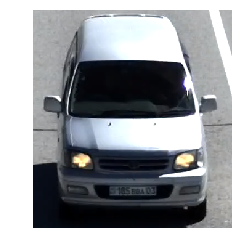

[]
[]
[]
images/16-45-11car.png


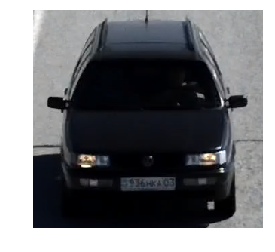

[]
[]
[]
images/16-38-06car.png


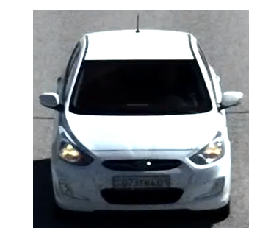

[]
[]
[]
images/16-39-22car.png


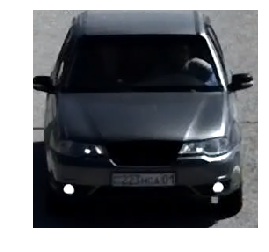

[]
[]
[]
images/164car.png


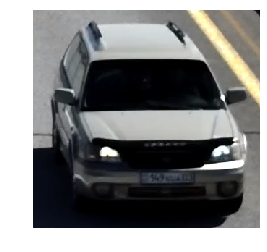

[]
[]
[]
images/example1.jpeg


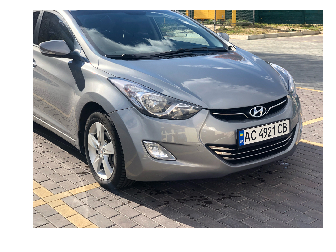

[[[1084.43083395  457.79968456]
  [1088.19423581  518.01411432]
  [ 876.12385117  571.83908504]
  [ 874.85462869  502.03184848]]]


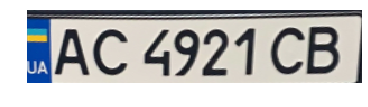

['eu_ua_2015']
['']
images/16car.png


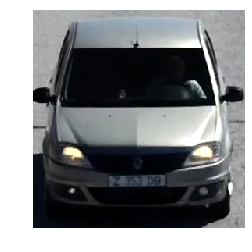

[]
[]
[]
images/16-88-99car.png


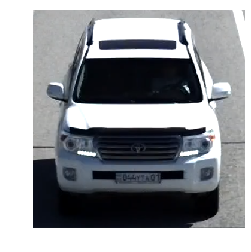

[]
[]
[]
images/16-38-44car.png


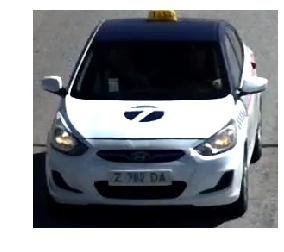

[]
[]
[]
images/20717578-39-full.jpg


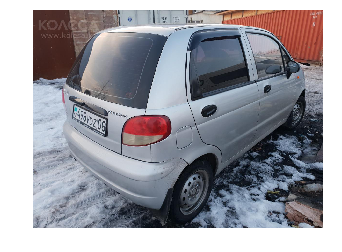

[[[168.53555882 391.73663827]
  [306.39888772 449.08778309]
  [303.66126605 517.52832489]
  [161.96193732 439.06671311]]]


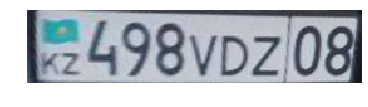

['kz']
['498VDZ08']
images/example2.jpeg


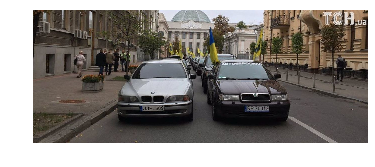

[[[851.         377.95455126]
  [947.37337512 380.12024508]
  [949.15380596 405.04627685]
  [851.         403.95567901]]

 [[524.48939569 377.96602551]
  [529.63953308 402.        ]
  [429.26000739 402.        ]
  [427.80259157 380.13876268]]]


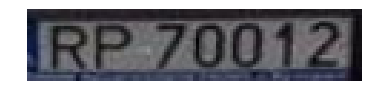

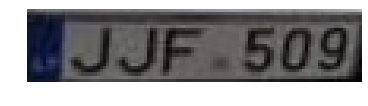

['eu', 'eu']
['RP70012', 'JJF509']
images/16-44-16car.png


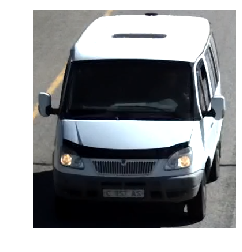

[]
[]
[]


In [16]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'images/'

max_img_w = 1600
for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        print(img_path)
        img = mpimg.imread(img_path)
        plt.axis("off")
        plt.imshow(img)
        plt.show()
         
        # corect size for better speed
        img_w = img.shape[1]
        img_h = img.shape[0]
        img_w_r = 1
        img_h_r = 1
        if img_w > max_img_w:
            resized_img = cv2.resize(img, (max_img_w, int(max_img_w/img_w*img_h)))
            img_w_r = img_w/max_img_w
            img_h_r = img_h/(max_img_w/img_w*img_h)
        else:
            resized_img = img

        NP = nnet.detect([resized_img]) 
        
        # Generate image mask.
        cv_img_masks = await filters.cv_img_mask_async(NP)
            
        # Detect points.
        arrPoints = await rectDetector.detectAsync(cv_img_masks, outboundHeightOffset=3-img_w_r, fixGeometry=True, fixRectangleAngle=10)
        print(arrPoints)
        arrPoints[..., 1:2] = arrPoints[..., 1:2]*img_h_r
        arrPoints[..., 0:1] = arrPoints[..., 0:1]*img_w_r
        
        # cut zones
        zones = await rectDetector.get_cv_zonesBGR_async(img, arrPoints)
        toShowZones = await rectDetector.get_cv_zonesRGB_async(img, arrPoints)
        for zone, points in zip(toShowZones, arrPoints):
            plt.axis("off")
            plt.imshow(zone)
            plt.show()
    
        # find standart
        regionIds, stateIds = optionsDetector.predict(zones)
        regionNames = optionsDetector.getRegionLabels(regionIds)
        print(regionNames)

        # find text with postprocessing by standart  
        textArr = textDetector.predict(zones, regionNames)
        textArr = await textPostprocessingAsync(textArr, regionNames)
        print(textArr)